# EDA - Google Play Store

### Introduction

The data is collected from https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps and inspired by work from https://www.kaggle.com/code/bextuychiev/my-6-part-powerful-eda-template.

The data has a total of 2.4M records of applications in the google play store. With billions of android phone in the world google play store is the most important app which allows end users to download and install applications of thier choice.
There are many different categories such as
 - Education
 - Adventure
 - Music
 - Social 
 - Tools
 - Entertainment
and many more.

### Objective

The objective of this notebook is to perform EDA on the different types of apps, ratings, which categories are more popular, understand the user behavior and how play store has grown over time.

### Approach Plan
   - Handling missing values
   - Handling duplicates
   - Data Normalization
   - Perform EDA
   - Build data visualizations
   - Build summary and report for stakeholders

## Importing data

In [1]:
#Importing standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing csv file and creating a dataframe
df = pd.read_csv("C:\\Users\\arunk\\Downloads\\Google-Playstore.csv")

In [3]:
# Validating the import to dataframe and checking the first 5 rows
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [4]:
# Identifying the total number of rows and columns
df.shape

(2312944, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [6]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


#### Observations
- The data contains 2312944 rows and 24 columns.
- Has 15 columns with object data type, 5 columns are float(4) and int(1), and 4 are boolean types.
- Columns like `Released`, `Last Updated` and `Scrapped time` are represented as object type though their values are datetime.
- Out of the 5 numerical columns
    - Rating: Has range starting from 0 to 5
    - Installations varies from 0 to billions.
    - The prices of the application are either free or charged and the highest paid app is 400.
 
 Note: We are unsure of the denomination value of price.

### Handling null values

In [7]:
# check for null values in each columns
missing_values = df.isnull().sum().sort_values(ascending= False)

In [8]:
missing_values

Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  2
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [9]:
df[df['App Name'].isnull()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
45686,NaN,se.promedia.NA,News & Magazines,2.4,470.0,"50,000+",50000.0,84097,True,0.0,...,https://www.na.se/app,kundservice.bnlo@bonniernews.se,"Aug 8, 2011","Dec 21, 2020",Everyone,https://www.na.se/info/mittmedias-personuppgif...,True,False,False,2021-06-15 21:04:54
2117918,NaN,com.Tomkii.NULl,Arcade,4.3,6.0,50+,50.0,98,True,0.0,...,NaN,tomek.rybinski@interia.pl,"Mar 17, 2021","Mar 17, 2021",Everyone,NaN,True,False,False,2021-06-16 10:09:12


In [10]:
df[df['Released'].isnull()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,True,0.0,...,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35
66,ChurchManagement (PLMT),fr.ekbz.churchManager,Productivity,0.0,0.0,10+,10.0,21,True,0.0,...,NaN,ekombrza@gmail.com,NaN,"May 03, 2020",Everyone,NaN,False,False,False,2021-06-15 20:19:39
115,VM-Delay,com.irv.vm_delay,Tools,NaN,NaN,50+,50.0,71,True,0.0,...,NaN,iv_dx@mail.com,NaN,"Oct 23, 2018",Everyone,NaN,False,False,False,2021-06-15 20:19:42
210,Promotor,com.touchesbegan.promotor,Productivity,NaN,NaN,100+,100.0,135,True,0.0,...,http://www.touchesbegan.com,info@touchesbegan.com,NaN,"Aug 14, 2017",Everyone,NaN,False,False,False,2021-06-15 20:19:48
230,opti*Map ED (Deutschland),de.HenkeSoft.optiMap_ED,Maps & Navigation,0.0,0.0,100+,100.0,120,True,0.0,...,http://www.opti-map.de,optiMap@henkesoft.de,NaN,"Jun 14, 2021",Everyone,http://www.en.de/optiMap_Privacy_Policy_EN.html,False,False,False,2021-06-15 20:19:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312847,Video Vault - Hide or Lock Your Private Videos,hidepictures.videolocker.filehider,Tools,0.0,0.0,100+,100.0,202,True,0.0,...,https://h951574c9.app-ads-txt.com,abhishekpandey817827@gmail.com,NaN,"Jun 13, 2021",Everyone,https://sites.google.com/view/andro-developer-...,True,False,False,2021-06-16 12:59:14
2312862,Deus,ventures.deus.pro,Lifestyle,0.0,0.0,500+,500.0,686,True,0.0,...,https://deuswallet.com,info@deuswallet.com,NaN,"Jun 05, 2020",Everyone,https://deus.technology/privacypolicy,False,False,False,2021-06-16 12:59:14
2312898,AppBundle,com.mercadolibre.android.test,Shopping,0.0,0.0,10+,10.0,14,True,0.0,...,http://www.mercadolibre.com,android.market@mercadolibre.com,NaN,"Nov 11, 2019",Everyone,http://ayuda.mercadolibre.com.ar/ayuda/Politic...,True,False,False,2021-06-16 12:59:17
2312907,Naandi CA,nahnikali.mahindra.com.project_nahnikali,Communication,3.7,93.0,"10,000+",10000.0,10827,True,0.0,...,http://www.mahindra.com,mobilityhelpdesk@mahindra.com,NaN,"Aug 29, 2019",Everyone,http://www.naandi.org/privacy-policy/,False,False,False,2021-06-16 12:59:17


#### Observations
- Out of the ~55 million data points the data frame has ~1.3 million missing values. Since all missing values cannot be dropped we will explore it further.


In [11]:
#Percentage of Missing Values from Total Missing Values
round(missing_values/(missing_values.sum())*100,4)

Developer Website    58.2681
Privacy Policy       32.2385
Released              5.4416
Rating                1.7525
Rating Count          1.7525
Minimum Android       0.5001
Size                  0.0150
Currency              0.0103
Installs              0.0082
Minimum Installs      0.0082
Developer Id          0.0025
Developer Email       0.0024
App Name              0.0002
App Id                0.0000
Price                 0.0000
Free                  0.0000
Maximum Installs      0.0000
Last Updated          0.0000
Content Rating        0.0000
Category              0.0000
Ad Supported          0.0000
In App Purchases      0.0000
Editors Choice        0.0000
Scraped Time          0.0000
dtype: float64

In [12]:
#Percentage of Missing Values from Entire Dataset
round(missing_values/len(df)*100,4)

Developer Website    32.8947
Privacy Policy       18.1999
Released              3.0720
Rating                0.9893
Rating Count          0.9893
Minimum Android       0.2823
Size                  0.0085
Currency              0.0058
Installs              0.0046
Minimum Installs      0.0046
Developer Id          0.0014
Developer Email       0.0013
App Name              0.0001
App Id                0.0000
Price                 0.0000
Free                  0.0000
Maximum Installs      0.0000
Last Updated          0.0000
Content Rating        0.0000
Category              0.0000
Ad Supported          0.0000
In App Purchases      0.0000
Editors Choice        0.0000
Scraped Time          0.0000
dtype: float64

#### Observation
- We can drop the columns which has the least impact on our dataset such as Size, Currency, Installs, Minimum Installs, Developer ID, Developer Email and App Name.
- We have to be cautious while performing EDA with columns associated with
    - Released
    - Rating
    - Rating count
    - Minimum Android
    - Developer website 
    - Privacy policy

In [13]:
#drop columns with null value rows which has less impact on our data
df.dropna(subset=['Size', 'Currency', 'Installs', 'Minimum Installs','Developer Id', 'Developer Email','App Name'], inplace=True)

In [14]:
df.shape

(2312548, 24)

In [15]:
# We dropped 396 rows
df.isnull().sum().sort_values(ascending= False)

Developer Website    760716
Privacy Policy       420845
Released              70748
Rating                22572
Rating Count          22572
Minimum Android        6530
Developer Id              0
Editors Choice            0
In App Purchases          0
Ad Supported              0
Content Rating            0
Last Updated              0
Developer Email           0
App Name                  0
App Id                    0
Size                      0
Currency                  0
Price                     0
Free                      0
Maximum Installs          0
Minimum Installs          0
Installs                  0
Category                  0
Scraped Time              0
dtype: int64

## Handling duplicates

In [16]:
# Find if there are any duplicates in the data
df.duplicated().any()

False

In [17]:
# find duplicates by column
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [18]:
df['App Name'].value_counts()

Tic Tac Toe                     382
Calculator                      261
Flashlight                      256
BMI Calculator                  201
Age Calculator                  190
                               ... 
Foodiz Resto                      1
Astra OtoReward                   1
MedTerm Dictionary                1
Urban garden and sowing.          1
Biliyor Musun - Sonsuz Yarış      1
Name: App Name, Length: 2177593, dtype: int64

In [19]:
df['App Id'].value_counts()

com.ishakwe.gakondo                    1
com.avai.amp.dewtour                   1
com.myhomebuy                          1
com.apocalipseescatologia.app          1
com.puzzlegame.wordconnect             1
                                      ..
id.compro.virtualcompetition           1
com.fitivity.basketball_point_guard    1
smartgr.gardenshower.ideas             1
com.euroland.mobiletools.ae_nbad       1
com.yyazilim.biliyormusun              1
Name: App Id, Length: 2312548, dtype: int64

In [20]:
df['Category'].value_counts().head()

Education        241068
Music & Audio    154897
Tools            143971
Business         143749
Entertainment    138261
Name: Category, dtype: int64

### Observation
- Based on the data we see there are no duplicate rows. However, there are duplicate entries with app name similarly most of the columns should be having duplicates. But they are not duplicate as they have different app id and other metadata.

In [21]:
df[df['App Name']== 'Tic Tac Toe']

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
3918,Tic Tac Toe,com.dev.atte.tic_tac_toe,Puzzle,0.0,0.0,10+,10.0,30,True,0.0,...,https://ne2ad32ee.app-ads-txt.com,dev.atte.francois@gmail.com,"May 18, 2018","May 18, 2018",Everyone,NaN,True,False,False,2021-06-15 20:23:22
13758,Tic Tac Toe,com.md.tictactoe,Board,0.0,0.0,10+,10.0,31,True,0.0,...,NaN,msms.zaman@gmail.com,"Nov 2, 2020","Nov 18, 2020",Everyone,https://smartdailytools.blogspot.com/2020/09/p...,True,False,False,2021-06-15 20:32:58
25351,Tic Tac Toe,com.sthirumuru.tictactoenew,Board,4.2,11.0,"5,000+",5000.0,6379,True,0.0,...,NaN,sundeep.thirumuru@gmail.com,"Apr 13, 2021","Jun 03, 2021",Everyone,NaN,True,False,False,2021-06-15 20:44:27
28142,Tic Tac Toe,com.fsk00x.TicTacToe,Board,0.0,0.0,500+,500.0,922,True,0.0,...,NaN,devmethyl@outlook.com,"Feb 13, 2020","Feb 13, 2020",Everyone,NaN,True,False,False,2021-06-15 20:47:17
30962,Tic Tac Toe,net.snatchdreams.tictactoe,Puzzle,0.0,0.0,10+,10.0,38,True,0.0,...,https://www.snatchdreams.net,snatchdreams@gmail.com,"Jul 16, 2017","Oct 16, 2019",Everyone,https://www.snatchdreams.net/privacy/tic-tac-toe/,True,False,False,2021-06-15 20:50:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272773,Tic Tac Toe,com.tictactoe.MobileAppsPro,Board,3.8,9269.0,"500,000+",500000.0,800662,True,0.0,...,NaN,smartyka@gmail.com,"Jan 9, 2015","May 20, 2015",Everyone,http://mobileappspro.yolasite.com,True,False,False,2021-06-16 12:23:56
2281376,Tic Tac Toe,com.erjainam.tictactoe.release,Board,0.0,0.0,50+,50.0,50,True,0.0,...,https://erjainam.com,engineerjainam@gmail.com,"Sep 2, 2018","Sep 02, 2018",Everyone,https://docs.google.com/document/d/1Tyi5D3VxZu...,True,False,False,2021-06-16 12:31:30
2282023,Tic Tac Toe,com.swapworld.tic_tac_toe,Board,4.7,7.0,10+,10.0,34,True,0.0,...,http://prudhvikchirunomula.pythonanywhere.com/,prudhvik.1996@gmail.com,"Sep 4, 2019","Sep 17, 2019",Everyone,NaN,False,False,False,2021-06-16 12:32:05
2299121,Tic Tac Toe,com.infuse.tictactoe,Board,4.8,20.0,100+,100.0,462,True,0.0,...,http://www.infuseapps.com,infuseandroidapps@gmail.com,"Jan 18, 2015","Jan 18, 2015",Everyone,NaN,True,False,False,2021-06-16 12:47:11


In [22]:
app_name_validation = df[df['App Name']== 'Tic Tac Toe']

In [23]:
app_name_validation['Developer Website'].value_counts()

https://popoko.live                        2
https://ne2ad32ee.app-ads-txt.com          1
https://www.dimsev-games.com/              1
http://www.alleviatetech.com               1
https://badal110899.blogspot.com           1
                                          ..
http://tutorialtous.com                    1
http://www.titicolab.com/                  1
https://www.multiprocessingmuggles.com/    1
https://letsdowebsite.com/                 1
http://www.infuseapps.com                  1
Name: Developer Website, Length: 153, dtype: int64

In [24]:
app_name_validation[app_name_validation['Developer Website'] == 'https://popoko.live']

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
83551,Tic Tac Toe,com.popoko.tictactoe,Board,3.9,109.0,"50,000+",50000.0,53754,True,0.0,...,https://popoko.live,contact@popoko.live,"Sep 23, 2020","Sep 29, 2020",Everyone,NaN,True,True,False,2021-06-15 21:42:04
1662114,Tic Tac Toe,com.popoko.gomokuvn,Board,3.9,1415.0,"100,000+",100000.0,498298,True,0.0,...,https://popoko.live,contact@popoko.live,"Oct 31, 2017","Aug 31, 2020",Everyone,http://popoko.live/privacy_policy.html,True,True,False,2021-06-16 03:39:24


### EDA

In [25]:
# Diving into null values in Rating column
df['Rating'].isnull().sum()

22572

In [26]:
df[df['Rating'].isnull()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
115,VM-Delay,com.irv.vm_delay,Tools,NaN,NaN,50+,50.0,71,True,0.0,...,NaN,iv_dx@mail.com,NaN,"Oct 23, 2018",Everyone,NaN,False,False,False,2021-06-15 20:19:42
210,Promotor,com.touchesbegan.promotor,Productivity,NaN,NaN,100+,100.0,135,True,0.0,...,http://www.touchesbegan.com,info@touchesbegan.com,NaN,"Aug 14, 2017",Everyone,NaN,False,False,False,2021-06-15 20:19:48
284,xrsta xatr,com.xrsta.xatr,Entertainment,NaN,NaN,10+,10.0,14,True,0.0,...,NaN,fremmepen@gmail.com,NaN,"Feb 08, 2020",Mature 17+,NaN,False,False,False,2021-06-15 20:19:52
501,GridChats,com.thegridnet.conference,Communication,NaN,NaN,50+,50.0,92,True,0.0,...,http://gridchats.com,support@gridchats.com,NaN,"Sep 20, 2018",Everyone,https://socialecosystem.com/en/terms,False,False,False,2021-06-15 20:20:05
662,Restaurant POS(Admin),org.wisdomfish.posadmin,Tools,NaN,NaN,10+,10.0,18,True,0.0,...,http://www.wisfish.com,service@wisfish.com,NaN,"Jul 25, 2016",Everyone,http://www.wisdomfish.org/welcome/privacy-policy,False,False,False,2021-06-15 20:20:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312545,Critical Cover Hunter Ops:Free Shooting Games ...,com.tgames.offline.shooter.black.strike.ops.fp...,Role Playing,NaN,NaN,"1,000+",1000.0,2275,True,0.0,...,NaN,taggames2020@gmail.com,NaN,"Mar 18, 2021",Teen,https://sites.google.com/view/topactiongamesta...,True,False,False,2021-06-16 12:58:57
2312553,Merlins Idle Apelsin,com.elitegamesltd.merlinsidle,Simulation,NaN,NaN,10+,10.0,44,True,0.0,...,NaN,efgames.net@gmail.com,NaN,"Nov 17, 2019",Everyone,http://theelitegames.net/privacy.html,False,False,False,2021-06-16 12:58:58
2312712,Joule Mobile App,com.companyname.Joule.Xamarin,Productivity,NaN,NaN,100+,100.0,215,True,0.0,...,NaN,guillermo@joule.ie,NaN,"Jan 27, 2020",Everyone,https://www.joule.ie/privacy-policy/,False,False,False,2021-06-16 12:59:06
2312751,Iris Profissional,com.sys4web.irisprofissional,Health & Fitness,NaN,NaN,50+,50.0,62,True,0.0,...,http://www.sys4web.com,mobile@sys4web.com,NaN,"Jul 24, 2019",Everyone,http://benevolentiav2.azurewebsites.net/static...,False,False,False,2021-06-16 12:59:08


In [27]:
# Installations and its values 
df['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [28]:
df[df['Minimum Installs'] == df['Minimum Installs'].max()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
2155096,Google Play services,com.google.android.gms,Tools,4.2,35128398.0,"10,000,000,000+",1.000000e+10,12057627016,True,0.0,...,https://developers.google.com/android/google-p...,apps-help@google.com,"May 24, 2012","Jun 10, 2021",Everyone,http://www.google.com/policies/privacy,False,False,False,2021-06-16 10:41:26


In [29]:
df[df['Minimum Installs'].isnull()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time


In [30]:
df[df['Maximum Installs'].isnull()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time


In [31]:
#df.head()
df['Rating Count'].unique()

array([0.0000e+00, 6.4000e+01, 5.0000e+00, ..., 8.7553e+04, 7.5960e+04,
       7.8351e+04])

In [32]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [33]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [34]:
# Size in the dataframe appears to be the size of the app
df['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

In [35]:
#Noramlising and standardizing the size column and replacing K,M and G with zeros
df['Size'] = df['Size'].str.replace('K','000')
df['Size'] = df['Size'].str.replace('M','000000')
df['Size'] = df['Size'].str.replace('G', '000000000')
# converting the Size column to a numeric value
df['Size'] = pd.to_numeric(df['Size'],errors='coerce')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312548 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               float64
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(5), int64(1), object(14)
memor

In [37]:
# Dividing the column by 1000000 to convert it into MB
df['Size'] = df['Size']/1000000

In [38]:
# Fill null values by average/mean size of the column since no app in the playstore will be having 0 size
df['Size'] = df['Size'].fillna(df['Size'].mean())

In [39]:
# Content Rating
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [40]:
df[df['Content Rating'] == 'Adults only 18+']

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
10846,PlayLive! - Casino & Slots,com.gan.cordish.real.pa,Entertainment,0.0,0.0,500+,500.0,632,True,0.0,...,https://playlive.com,support@playlive.com,"May 20, 2021","May 20, 2021",Adults only 18+,https://playlive.com/privacy-policy.shtml,False,False,False,2021-06-15 20:30:11
23610,Playzee,com.playzee.casino,Casino,1.9,12.0,"1,000+",1000.0,1298,True,0.0,...,http://www.Yellowdaymarketing.com,Dev@yellowdaymarketing.com,"Mar 17, 2019","Mar 17, 2019",Adults only 18+,https://www.playzee.com/privacy,False,False,False,2021-06-15 20:42:37
73178,DraftKings - Daily Fantasy Sports for Cash,com.draftkings.dknativermgGP,Sports,4.5,81954.0,"1,000,000+",1000000.0,4752559,True,0.0,...,http://www.draftkings.com,support@draftkings.com,"Apr 16, 2015","Jun 07, 2021",Adults only 18+,https://www.draftkings.com/help/privacynotice,True,False,False,2021-06-15 21:32:02
87349,DJ Golden Star Entertainment Ferdinant Mix 2020,com.dj.golden.star.Entertainment,Music & Audio,4.3,70.0,"5,000+",5000.0,6654,True,0.0,...,NaN,mohkentaibrahim@gmail.com,"Oct 13, 2019","Oct 13, 2019",Adults only 18+,https://ibrahimmohkentaprivacypolicy.blogspot....,True,False,False,2021-06-15 21:46:02
88868,BetMGM Poker - New Jersey,com.mgmpoker.poker,Casino,2.8,8.0,"1,000+",1000.0,2174,True,0.0,...,https://poker.nj.betmgm.com/en/poker,support@betmgmsports.com,"Mar 3, 2021","Apr 22, 2021",Adults only 18+,https://help.nj.betmgm.com/en/general-informat...,False,False,False,2021-06-15 21:47:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212587,Success Always Positive,success.always.positive_motivational,Education,0.0,0.0,500+,500.0,669,True,0.0,...,NaN,INFO@EVEGIMPEX.COM,"Nov 14, 2019","Nov 15, 2019",Adults only 18+,https://dailyearncash.in/success-always-positi...,True,False,False,2021-06-16 11:31:37
2268991,viivbook,com.viivbook.overseas,Dating,0.0,0.0,10+,10.0,22,True,0.0,...,https://learn.viivbook.net/,message@viivbook.net,"May 6, 2021","Jun 07, 2021",Adults only 18+,https://learn.viivbook.net/manage/#/viivUser/list,True,False,False,2021-06-16 12:20:37
2282507,Star Movie Channel,com.starmovie.app2,Entertainment,4.0,8.0,"1,000+",1000.0,3164,True,0.0,...,NaN,shinkaykhaing@gmail.com,"Jun 25, 2020","Jun 25, 2020",Adults only 18+,NaN,True,False,False,2021-06-16 12:32:29
2289749,Foranta RiB,rib.option,Events,0.0,0.0,1+,1.0,2,True,0.0,...,http://www.somtech.info,forantarib@gmail.com,"Jan 29, 2021","Jan 29, 2021",Adults only 18+,https://www.somtech.info/2020/11/privacy-polic...,False,False,False,2021-06-16 12:38:51


#### We will recategorize the content rating to simple ratings
- Everyone -- Everyone, unrated
- Teen -- Teen, Everyone 10+
- Adults - Adults only 18+, Mature 17+

In [41]:
# Replace 'Unrated' with 'Everyone'
df['Content Rating'] = df['Content Rating'].replace('Unrated', 'Everyone')

# Replace 'Everyone 10+' with 'Teen'
df['Content Rating'] = df['Content Rating'].replace('Everyone 10+', 'Teen')

# Replace 'Mature 17+' with 'Adults'
df['Content Rating'] = df['Content Rating'].replace('Mature 17+', 'Adults')

# Replace 'Adults only 18+' with 'Adults'
df['Content Rating'] = df['Content Rating'].replace('Adults only 18+', 'Adults')

# Found an error and fixed it by manually refixing the code
df['Content Rating'] = df['Content Rating'].replace('Adults+', 'Adults')
df['Content Rating'] = df['Content Rating'].replace('Teen+', 'Teen')


# Check unique values after replacements
print(df['Content Rating'].unique())


['Everyone' 'Teen' 'Adults']


In [42]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

In [43]:
df['Content Rating'].value_counts()

Everyone    2021942
Teen         230192
Adults        60414
Name: Content Rating, dtype: int64

### EDA and data visualization

In [44]:
# What is the total no.of apps present after cleaning and removing duplicates
df['App Name'].value_counts().sum()

2312548

In [45]:
# What are the different types of categories present in the dataframe
df['Category'].nunique()


48

In [46]:
#Finding different categories
df['Category'].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [47]:
# Top 25 categories with most apps
apps_per_categories = df['Category'].value_counts()
apps_per_categories

Education                  241068
Music & Audio              154897
Tools                      143971
Business                   143749
Entertainment              138261
Lifestyle                  118321
Books & Reference          116716
Personalization             89207
Health & Fitness            83497
Productivity                79681
Shopping                    75240
Food & Drink                73918
Travel & Local              67279
Finance                     65450
Arcade                      53779
Puzzle                      51151
Casual                      50790
Communication               48157
Sports                      47473
Social                      44724
News & Magazines            42799
Photography                 35552
Medical                     32063
Action                      27539
Maps & Navigation           26721
Simulation                  23268
Adventure                   23193
Educational                 21302
Art & Design                18536
Auto & Vehicle

In [48]:
# Percentage of apps per category
round((df['Category'].value_counts())/(df['Category'].value_counts().sum())*100,2)

Education                  10.42
Music & Audio               6.70
Tools                       6.23
Business                    6.22
Entertainment               5.98
Lifestyle                   5.12
Books & Reference           5.05
Personalization             3.86
Health & Fitness            3.61
Productivity                3.45
Shopping                    3.25
Food & Drink                3.20
Travel & Local              2.91
Finance                     2.83
Arcade                      2.33
Puzzle                      2.21
Casual                      2.20
Communication               2.08
Sports                      2.05
Social                      1.93
News & Magazines            1.85
Photography                 1.54
Medical                     1.39
Action                      1.19
Maps & Navigation           1.16
Simulation                  1.01
Adventure                   1.00
Educational                 0.92
Art & Design                0.80
Auto & Vehicles             0.79
House & Ho

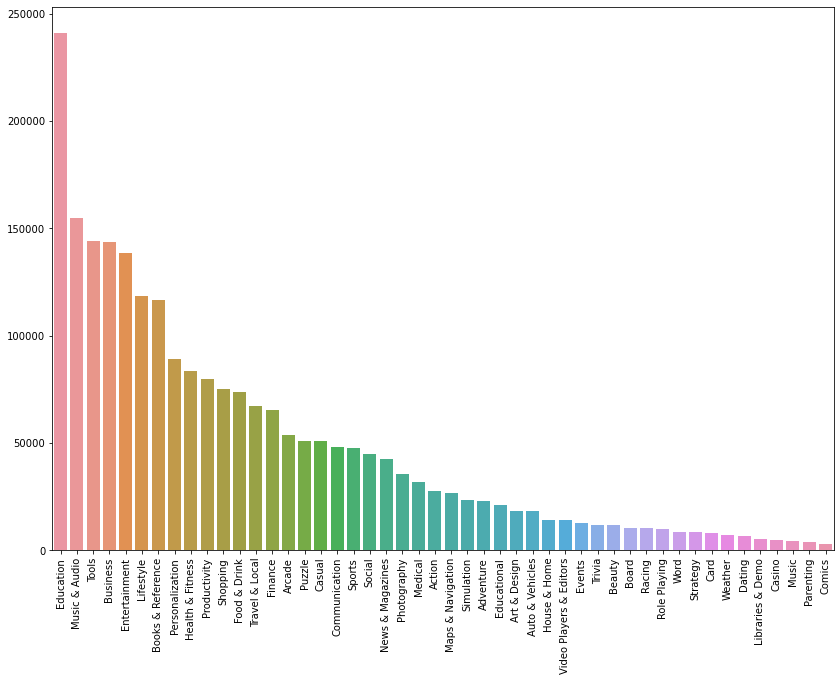

In [49]:
plt.figure(figsize=(14,10))
ax = sns.barplot(x=apps_per_categories.index,y=apps_per_categories.values)
plt.xticks(rotation=90)
plt.show()

In [50]:
# No.of apps received ratings
df['Rating'].value_counts()

0.0    1059731
5.0     100119
4.2      87990
4.4      86303
4.3      83272
4.6      78300
4.5      76750
4.1      69722
4.0      67338
4.7      62204
4.8      61106
3.9      55682
3.8      53860
4.9      44522
3.7      43298
3.6      35985
3.5      31635
3.4      28905
3.3      22612
3.2      21482
3.0      17274
3.1      15538
2.8      12234
2.9      11522
2.6       9212
2.7       9199
2.5       6942
2.4       6050
2.3       5412
2.2       4954
2.0       3804
2.1       3675
1.8       2957
1.9       2588
1.7       1928
1.6       1644
1.5       1157
1.4       1011
1.0        713
1.3        579
1.2        531
1.1        236
Name: Rating, dtype: int64

In [51]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

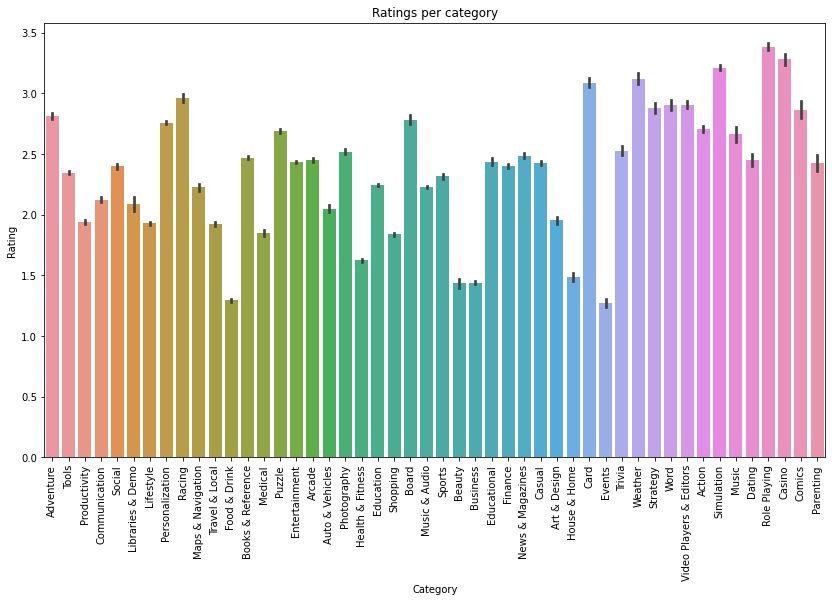

In [52]:
# Plotting Ratings received per category
plt.figure(figsize=(14,8))
ax = sns.barplot(x=df['Category'],y=df['Rating'])
plt.xticks(rotation=90)
plt.title('Ratings per category')
plt.show()

In [53]:
# Finding top 5 apps per category
apps_per_category1 = df.groupby(['Category', 'App Name', 'Maximum Installs']).size().reset_index(name = 'count').sort_values(by=['Category', 'Maximum Installs'], ascending=[True, False])

In [54]:
apps_per_category1

,Category,App Name,Maximum Installs,count
9519,Action,Garena Free Fire - Rampage,976536041,1
22782,Action,Temple Run 2,837218010,1
19691,Action,Sniper 3D: Fun Free Online FPS Shooting Game,518325903,1
15698,Action,PUBG MOBILE - Traverse,505818718,1
26716,Action,slither.io,487164438,1
...,...,...,...,...
2310702,Word,crossword,0,1
2311172,Word,"Угадай слово: найди слова, из букв составить с...",0,1
2311255,Word,ابحث عن اسم الوجبة,0,1
2311475,Word,هوش طلایی,0,1


In [55]:
def get_top_apps(apps_per_category1):
    return apps_per_category1.sort_values(by='Maximum Installs', ascending=False).head(10)

# Apply the function to each group (category)
top_apps_per_category = df.groupby('Category').apply(get_top_apps).reset_index(drop=True)

#print(top_apps_per_category[['Category', 'App Name', 'Maximum Installs']])
top_apps_per_category

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Garena Free Fire - Rampage,com.dts.freefireth,Action,4.2,89177097.0,"500,000,000+",500000000.0,976536041,True,0.0,...,https://ff.garena.com,freefire@garena.com,"Dec 7, 2017","Jun 04, 2021",Adults,https://ff.garena.com/others/policy/en/,False,True,True,2021-06-16 00:32:12
1,Temple Run 2,com.imangi.templerun2,Action,4.2,9649311.0,"500,000,000+",500000000.0,837218010,True,0.0,...,http://www.imangistudios.com/contact.html,support-tr2@imangistudios.com,"Jan 23, 2013","Jun 08, 2021",Everyone,http://imangistudios.com/privacy/privacy-polic...,True,True,True,2021-06-16 14:28:54
2,Sniper 3D: Fun Free Online FPS Shooting Game,com.fungames.sniper3d,Action,4.4,1285629.0,"500,000,000+",500000000.0,518325903,True,0.0,...,https://wildlifestudios.com/,support+sniper3d@fungames-forfree.com,"Nov 13, 2014","Jun 04, 2021",Adults,https://www.fungames-forfree.com/games/sniper3...,True,True,False,2021-06-15 23:05:48
3,PUBG MOBILE - Traverse,com.tencent.ig,Action,4.3,37479011.0,"500,000,000+",500000000.0,505818718,True,0.0,...,NaN,PUBGMOBILE_CS@tencentgames.com,"Mar 19, 2018","May 10, 2021",Teen,http://pubgmobile.proximabeta.com/privacy.html,True,True,True,2021-06-15 21:17:17
4,slither.io,air.com.hypah.io.slither,Action,4.1,6527424.0,"100,000,000+",100000000.0,487164438,True,0.0,...,http://slither.io,team@slither.io,"Mar 25, 2016","Dec 20, 2019",Everyone,http://slither.io/privacyapp/,True,True,False,2021-06-16 06:28:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,4 Pics 1 Word,de.lotum.whatsinthefoto.us,Word,4.5,1180828.0,"50,000,000+",50000000.0,62503403,True,0.0,...,https://lotum.com,games@lotum.de,"Feb 13, 2013","Jun 09, 2021",Everyone,https://lotum.com/privacy-policy.html,True,True,False,2021-06-16 02:36:19
476,Draw Something Classic,com.omgpop.dstfree,Word,4.2,1127899.0,"50,000,000+",50000000.0,58764481,True,0.0,...,https://www.zynga.com/,android.support@zynga.com,"Feb 1, 2012","Feb 18, 2021",Everyone,https://www.zynga.com/privacy/policy,True,True,False,2021-06-16 10:21:21
477,Wordscapes,com.peoplefun.wordcross,Word,4.6,979745.0,"50,000,000+",50000000.0,57011598,True,0.0,...,https://www.peoplefun.com,wordscapes@peoplefun.com,"Jun 14, 2017","May 27, 2021",Everyone,http://www.peoplefun.com/privacy,True,True,False,2021-06-16 01:36:16
478,Word Link,com.word.puzzle.game.connect,Word,4.4,501401.0,"50,000,000+",50000000.0,55477838,True,0.0,...,https://www.89trillion.com,wordlink@boooea.com,"Oct 29, 2017","May 15, 2021",Everyone,http://www.wordlinkplay.com/privacy.html,True,True,False,2021-06-16 07:57:24


In [56]:
top10_apps_per_Category = pd.DataFrame(columns=['Category','App Name','Maximum Installs'])
top10_apps_per_Category = top_apps_per_category[['Category', 'App Name', 'Maximum Installs']]

In [57]:
top10_apps_per_Category

,Category,App Name,Maximum Installs
0,Action,Garena Free Fire - Rampage,976536041
1,Action,Temple Run 2,837218010
2,Action,Sniper 3D: Fun Free Online FPS Shooting Game,518325903
3,Action,PUBG MOBILE - Traverse,505818718
4,Action,slither.io,487164438
...,...,...,...
475,Word,4 Pics 1 Word,62503403
476,Word,Draw Something Classic,58764481
477,Word,Wordscapes,57011598
478,Word,Word Link,55477838


In [58]:
max_installations_per_rating = df.groupby('Rating')['Maximum Installs'].sum().reset_index()

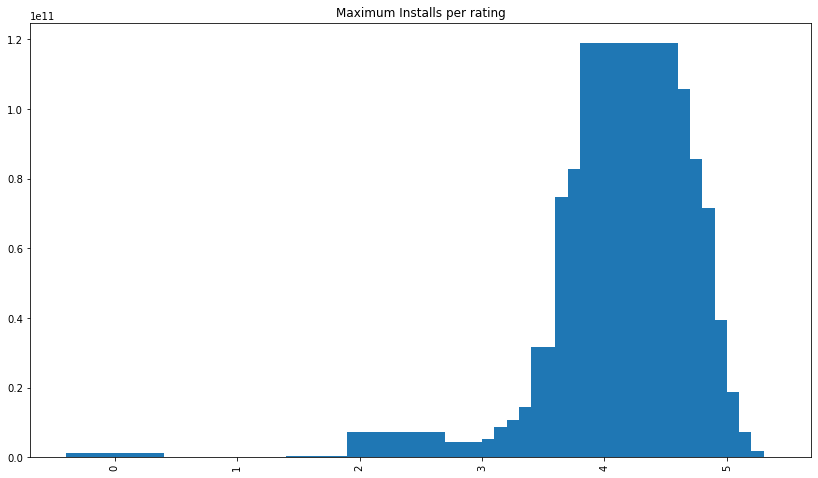

In [59]:
# Plotting maximum number of installations per rating
plt.figure(figsize=(14,8))
plt.bar(max_installations_per_rating['Rating'],max_installations_per_rating['Maximum Installs'])
plt.xticks(rotation=90)
plt.title('Maximum Installs per rating')
plt.show()

In [60]:
min_installations_per_rating = df.groupby('Rating')['Minimum Installs'].sum().reset_index()

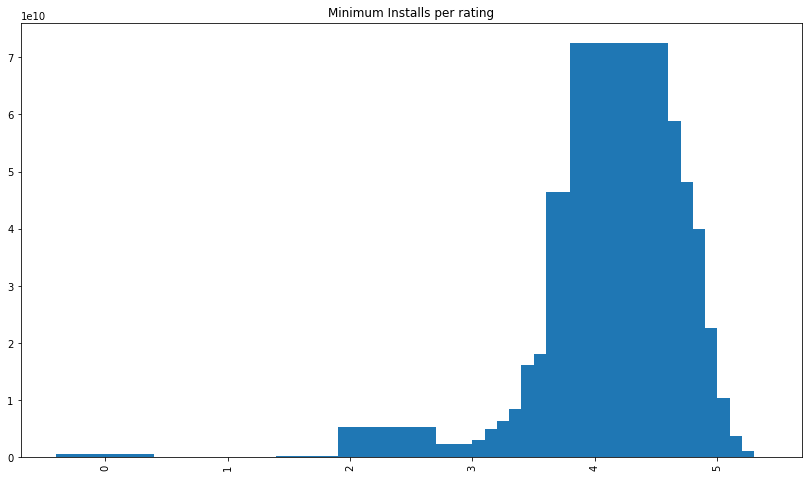

In [61]:
# Plotting minumum number of installations per rating
plt.figure(figsize=(14,8))
plt.bar(min_installations_per_rating['Rating'],min_installations_per_rating['Minimum Installs'])
plt.xticks(rotation=90)
plt.title('Minimum Installs per rating')
plt.show()

In [62]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [63]:
df['Free'].unique()

array([ True, False])

In [64]:
# No.of app which are free 
free_apps = df[df['Free']==True]
count_free_apps = free_apps['App Name'].value_counts().sum()

In [65]:
Total_apps = df['App Name'].value_counts().sum()

In [66]:
# No.of app which are not free 
non_free_apps = df[df['Free']==False]
count_non_free_apps = non_free_apps['App Name'].value_counts().sum()

In [67]:
# Percentage of Free apps and non free apps
print('Percenatge of free apps:', (round((count_free_apps / Total_apps*100),2)),'(',count_free_apps,')')
print('Percenatge of non-free apps:', (round((count_non_free_apps / Total_apps*100),2)),'(',count_non_free_apps,')')

Percenatge of free apps: 98.06 ( 2267619 )
Percenatge of non-free apps: 1.94 ( 44929 )


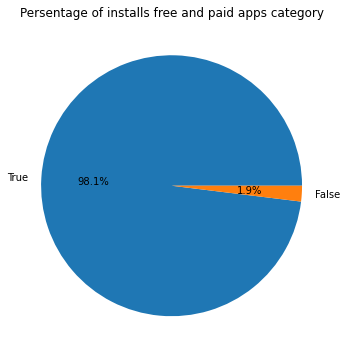

In [68]:
# Create a pie plot show the persentage of insatll free and paid apps category
plt.figure(figsize=(6,6))
plt.pie(df['Free'].value_counts(), labels=['True', 'False'], autopct='%1.1f%%')
plt.title('Persentage of installs free and paid apps category')
plt.show()

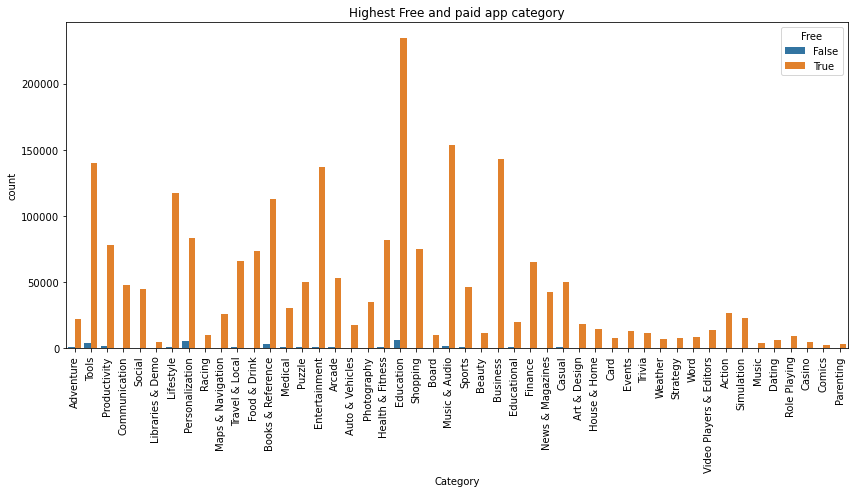

In [69]:
# Paid and non paid apps per category
plt.figure(figsize=(14,6))
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Highest Free and paid app category')
sns.countplot(x='Category', data=df, hue='Free')
plt.show()

In [70]:
# Top 10 apps with most number of installations
top_installed_app = df.sort_values(by='Maximum Installs',ascending= False).head(10)
top10_installed_app = top_installed_app[['App Name','Maximum Installs']].reset_index(drop=True)
top10_installed_app

,App Name,Maximum Installs
0,Google Play services,12057627016
1,YouTube,9766230924
2,Google,9154248491
3,Google Maps - Navigate & Explore,9141671889
4,Google Text-to-Speech,9034404884
5,Google Chrome: Fast & Secure,8925640788
6,Gmail,8756574289
7,Android Accessibility Suite,7408134567
8,Google Drive,7028265259
9,Facebook,6782619635


In [71]:
# Top 10 apps with least number of installations
least_installed_app = df.sort_values(by='Minimum Installs',ascending= True).head(10)
least10_installed_app = least_installed_app[['App Name','Minimum Installs']].reset_index(drop=True)
least10_installed_app

,App Name,Minimum Installs
0,Blueprint Training Fitness App,0.0
1,Famooshed,0.0
2,The Cemeturion,0.0
3,JA Jiu-Jitsu,0.0
4,Let Help For Health,0.0
5,TableTopCharacterCreator,0.0
6,Bandy jump,0.0
7,tips simpel memberikan ASI untuk working moms,0.0
8,"The Burger Hub, Northampton",0.0
9,Decathlon AR Underwater,0.0


In [72]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price,Size
count,2.289976e+06,2.289976e+06,2.312548e+06,2.312548e+06,2.312548e+06,2.312548e+06
mean,2.203142e+00,2.864939e+03,1.834625e+05,3.202449e+05,1.035132e-01,1.696575e+01
std,2.106227e+00,2.121665e+05,1.513238e+07,2.355697e+07,2.633350e+00,2.487035e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-06
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00,5.300000e-06
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00,1.100000e+01
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00,2.400000e+01
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02,9.960000e+02


#### Fixing Rating and Rating count columns since null indicates no ratings received. Hence filling the values with 0

In [73]:
#Using fillna to fill the null values 
df['Rating'] = df['Rating'].fillna(0)

In [74]:
df['Rating'].isnull().sum()

0

In [75]:
#Using fillna to fill the null values in Rating Count column
df['Rating Count'] = df['Rating Count'].fillna(0)

In [76]:
df['Rating Count'].isnull().sum()

0

In [77]:
# Apps which received the most reviews and is above the mean rating count
avg_apps_ratings_count = df[df['Rating Count'] >= df['Rating Count'].mean()]

In [78]:
# Top 10 apps which received the most reviews and is above the mean rating count
top10_rating_company = avg_apps_ratings_count.sort_values(by='Rating',ascending=False).head(10)

In [79]:
top10_rating_company[['App Name','Rating','Rating Count','Maximum Installs']].reset_index(drop=True).sort_values(by='Maximum Installs',ascending=False)

,App Name,Rating,Rating Count,Maximum Installs
1,Glitch Video Effect - Glitch FX,5.0,4827.0,1985912
7,Ball Robot Transform Bike War : Robot Games,5.0,7303.0,1150949
0,Euro Train Robot Transform: Train Games,5.0,4829.0,775288
3,Last Bird Trip - Free Flappy Birdie Arcade Game,5.0,12901.0,616587
2,Jigsaw Kingdoms - puzzle game,5.0,4589.0,440938
5,Speed Car Parking 2021 - New Parking Game 2021,5.0,2909.0,173133
8,Block Puzzle 2021,5.0,3495.0,69137
4,Viețile Sfinților,5.0,3074.0,42578
6,Flappy Trip,5.0,7907.0,15789
9,仙俠起源傳說-掛機修仙養成RPG,5.0,3111.0,10124


In [80]:
# Least rated 10 apps which received the most reviews and is above the mean rating count

low_avg_apps_ratings_count = df[df['Rating Count'] >= df['Rating Count'].mean()]
Least_rated_company_10 = avg_apps_ratings_count.sort_values(by='Rating',ascending=True).head(10)
Least_rated_company_10[['App Name','Rating','Rating Count','Maximum Installs']].reset_index(drop=True)

,App Name,Rating,Rating Count,Maximum Installs
0,Thingiverse,1.1,10468.0,659787
1,Quizeroj - News Quiz & More,1.1,5356.0,192562
2,Sinemia,1.1,4231.0,314257
3,BOTOLA,1.1,6891.0,1065161
4,TV9 Telugu,1.1,18681.0,2228490
5,"СМОТРИМ. Россия, ТВ и радио",1.2,8623.0,1204075
6,The 30th SMA Official Voting App,1.2,36462.0,905040
7,SNRT Live,1.2,29518.0,3260372
8,MOLA - Broadcaster Resmi Liga Inggris 2019-2022,1.3,121805.0,4643976
9,Owl - Predictor Mania,1.3,4365.0,985536


### Times Series analysis

In [81]:
# Find the number of null values in Released column
df['Released'].isnull().sum()

70748

In [82]:
# FInd the number of null values in Last Updated column
df['Last Updated'].isnull().sum()

0

In [83]:
# Fill the released column which has null values with last updated column values
df['Released'] = df['Released'].fillna(df['Last Updated'])

#### Observation 
The column Released has 70K null values whereas the column Last Updated has zero null values. Logically if an app does not have a release date then we will consider the updated date as a released date.

In [84]:
# Checking the values in Released columns and converting it into date type
df['Released'] = pd.to_datetime(df['Released'],format='%b %d, %Y')

In [85]:
df['Released']

0         2020-02-26
1         2020-05-21
2         2019-08-09
3         2018-09-10
4         2020-02-21
             ...    
2312939   2021-06-01
2312940   2018-01-17
2312941   2018-08-19
2312942   2016-08-01
2312943   2019-08-09
Name: Released, Length: 2312548, dtype: datetime64[ns]

In [86]:
# Checking the values in Last Updated columns and converting it into date type
df['Last Updated'] = pd.to_datetime(df['Last Updated'],format='%b %d, %Y')

In [87]:

df['date_diff_flag'] = df['Last Updated'] - df['Released']

In [88]:
df['date_diff_flag']

0            0 days
1          350 days
2           10 days
3           33 days
4         -466 days
             ...   
2312939      0 days
2312940     16 days
2312941      0 days
2312942   1738 days
2312943     10 days
Name: date_diff_flag, Length: 2312548, dtype: timedelta64[ns]

In [89]:
# Most number of apps per catergory
top_10_categories = df['Category'].value_counts().reset_index()

top_10_categories = top_10_categories.rename(columns={'index': 'Category', 'Category': 'Count of Category'})
top_10_categories = top_10_categories.head(10)

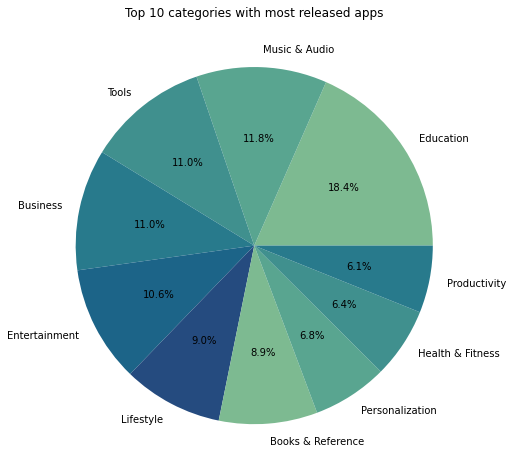

In [90]:
#Plotting a pie chart
plt.figure(figsize=(8,10))
palette = sns.color_palette("crest")
plt.pie(top_10_categories['Count of Category'], labels=top_10_categories['Category'],autopct='%1.1f%%',colors=palette)
plt.title('Top 10 categories with most released apps')
plt.show()

In [91]:
# Top 10 category and their mean rating sorted by descending order
top10_rating_category = df.groupby('Category')['Rating'].mean().reset_index().sort_values(by='Rating',ascending=False).head(10)
top10_rating_category = pd.DataFrame(top10_rating_category)
top10_rating_category

,Category,Rating
36,Role Playing,3.265797
10,Casino,3.253191
38,Simulation,3.135817
46,Weather,3.070638
9,Card,3.036110
35,Racing,2.908378
45,Video Players & Editors,2.885400
47,Word,2.867764
12,Comics,2.823864
41,Strategy,2.784255


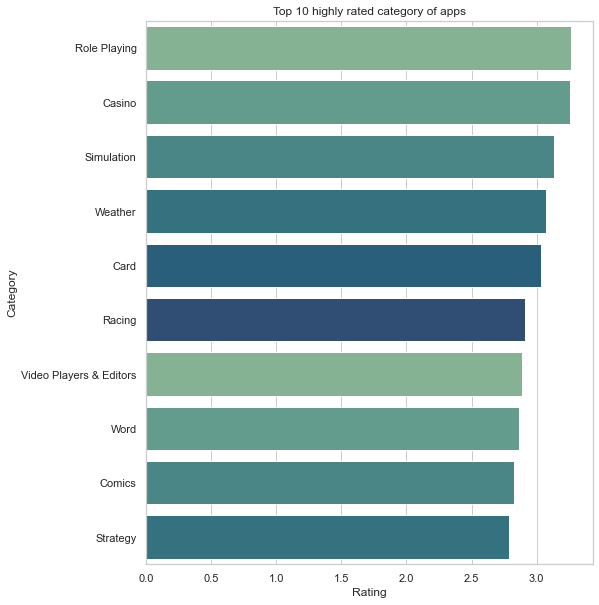

In [92]:
# Plotting the average top 10 rated categories 
plt.figure(figsize=(8,10))
sns.set(style='whitegrid')
palette = sns.color_palette("crest")
#palette = sns.cubehelix_palette(as_cmap=True)  # Generating Cubehelix palette
sns.barplot(data=top10_rating_category,x='Rating',y='Category',palette = palette)
plt.title('Top 10 highly rated category of apps')
plt.show()

In [93]:
df['Content Rating'].value_counts()

Everyone    2021942
Teen         230192
Adults        60414
Name: Content Rating, dtype: int64

In [94]:
df.groupby('Content Rating')['Rating Count'].mean()

Content Rating
Adults      5522.705217
Everyone    2007.821629
Teen        9415.156834
Name: Rating Count, dtype: float64

In [95]:
df.groupby('Content Rating')['Rating Count'].median()

Content Rating
Adults      10.0
Everyone     5.0
Teen         8.0
Name: Rating Count, dtype: float64

In [96]:
top_apps_per_category.groupby('Content Rating')['Rating Count'].mean()

Content Rating
Adults      6.327725e+06
Everyone    3.374215e+06
Teen        7.372785e+06
Name: Rating Count, dtype: float64

In [97]:
df['Week_number'] = df['Released'].dt.strftime('W%V-%Y')

In [98]:
df['Month_Year'] = df['Released'].dt.strftime('%B-%Y')  # Full month name

In [99]:
df['Year'] = df['Released'].dt.isocalendar().year # Full month name


In [100]:
released_apps_year = df['Year'].value_counts().reset_index().rename(columns={'index':'released_year','Year':'no_of_apps_released'})

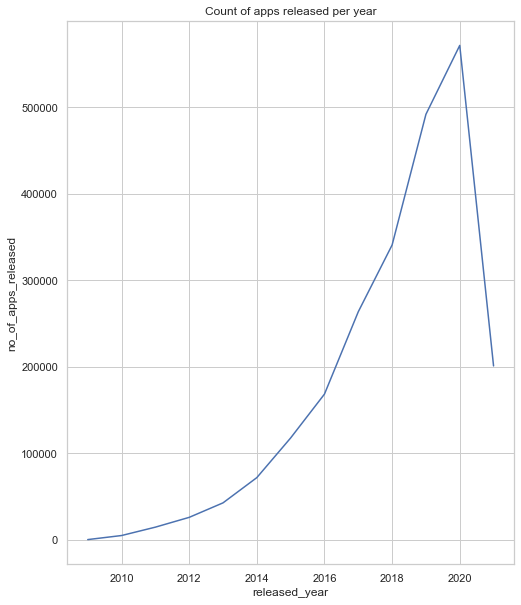

In [101]:
# No.of apps released per Year
plt.figure(figsize=(8,10))
sns.lineplot(data=released_apps_year,x='released_year',y='no_of_apps_released')
plt.title('Count of apps released per year')
plt.show()

In [102]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time', 'date_diff_flag', 'Week_number', 'Month_Year', 'Year'],
      dtype='object')

In [103]:
df['month_released'] = df['Released'].dt.strftime('%B')

In [104]:
df['month_released']

0           February
1                May
2             August
3          September
4           February
             ...    
2312939         June
2312940      January
2312941       August
2312942       August
2312943       August
Name: month_released, Length: 2312548, dtype: object

In [105]:
released_apps_month = df['Month_Year'].value_counts().reset_index().rename(columns={'index':'released_month/year','Month_Year':'no_of_apps_released'})

In [106]:
released_apps_month

,released_month/year,no_of_apps_released
0,June-2020,53609
1,May-2020,53525
2,July-2020,51401
3,January-2020,49784
4,April-2020,49467
...,...,...
141,November-2009,1
142,April-2009,1
143,August-2009,1
144,June-2009,1


In [107]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time', 'date_diff_flag', 'Week_number', 'Month_Year', 'Year',
       'month_released'],
      dtype='object')

In [108]:
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", 
               "December"]

# Convert month_released to a categorical type with the specified order
df['month_released'] = pd.Categorical(df['month_released'], categories=month_order, ordered=True)

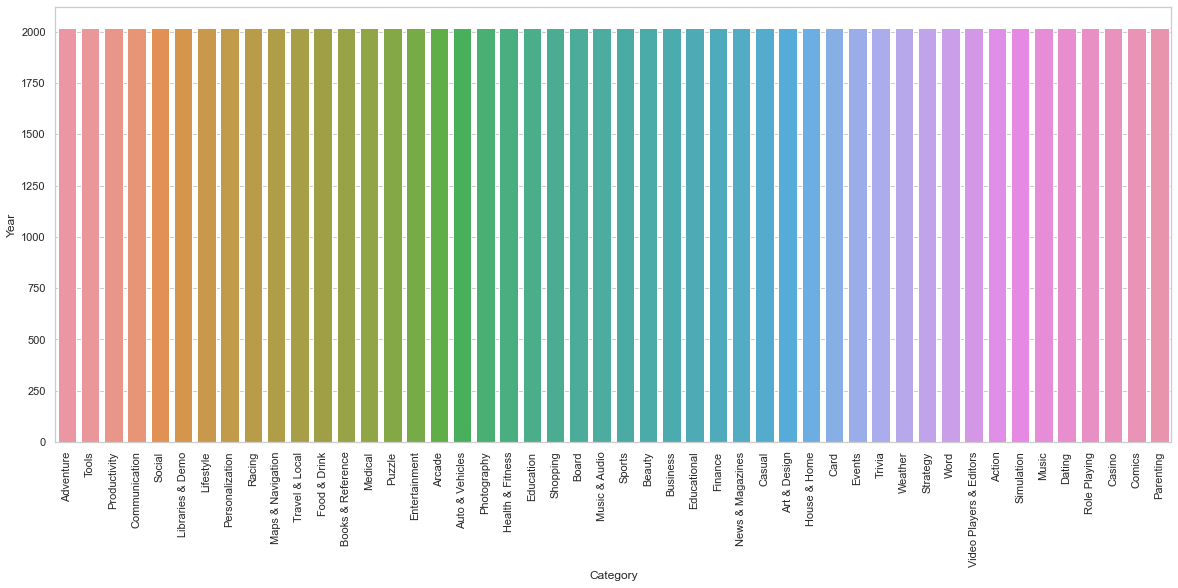

In [109]:
plt.figure(figsize=(20,8))
sns.barplot(data=df,x='Category',y='Year')
plt.xticks(rotation=90)
plt.show()

In [110]:
year_and_month_released = df.groupby(['Year','month_released']).size().reset_index(name='count')

In [111]:
year_and_month_released

,Year,month_released,count
0,2009,January,1
1,2009,February,2
2,2009,March,0
3,2009,April,1
4,2009,May,0
...,...,...,...
151,2021,August,0
152,2021,September,0
153,2021,October,0
154,2021,November,0


In [112]:
# Verify the structure of the DataFrame
print(year_and_month_released.head())
print(year_and_month_released.dtypes)

   Year month_released  count
0  2009        January      1
1  2009       February      2
2  2009          March      0
3  2009          April      1
4  2009            May      0
Year                UInt32
month_released    category
count                int64
dtype: object


In [113]:
year_and_month_released['Year'] = year_and_month_released['Year'].astype(int)

In [114]:
# Verify the structure of the DataFrame
print(year_and_month_released.head())
print(year_and_month_released.dtypes)

   Year month_released  count
0  2009        January      1
1  2009       February      2
2  2009          March      0
3  2009          April      1
4  2009            May      0
Year                 int32
month_released    category
count                int64
dtype: object


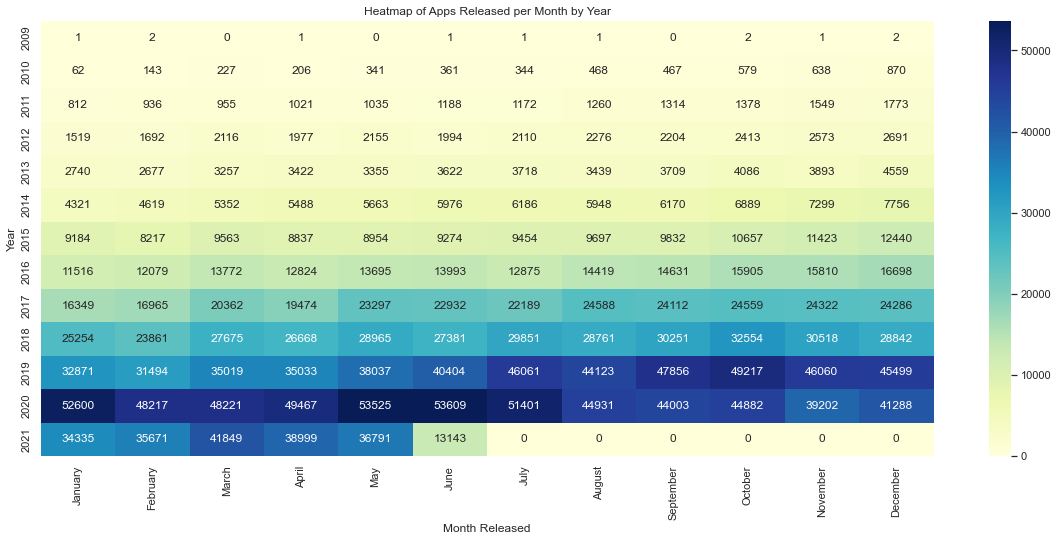

In [115]:
# Pivot the data for heatmap
pivot_table = year_and_month_released.pivot("Year", "month_released", "count")

plt.figure(figsize=(20,8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Apps Released per Month by Year")
plt.xlabel("Month Released")
plt.ylabel("Year")
plt.xticks(rotation=90)
plt.show()

In [116]:
#total_apps_released_each_year = year_and_month_released.groupby('Year')['count'].sum().reset_index(name='Total_apps_Released')

In [117]:
df.groupby('Category')['Maximum Installs'].sum().reset_index(name='Total Installs').sort_values(by='Total Installs',ascending = False)

,Category,Total Installs
42,Tools,119849037541
13,Communication,72306400349
33,Productivity,45367952694
17,Entertainment,32544500533
39,Social,32216874328
32,Photography,31590959146
45,Video Players & Editors,31439400657
0,Action,30741107588
11,Casual,30524610368
2,Arcade,25681531770


In [118]:
paid_apps_list = df[df['Free'] == False]
#df.groupby('Category')['Free'].value_counts

In [119]:
paid_apps_list['Category'].value_counts()

Education                  6547
Personalization            5767
Tools                      4077
Books & Reference          3597
Productivity               1731
Music & Audio              1524
Travel & Local             1414
Health & Fitness           1412
Entertainment              1381
Medical                    1366
Sports                     1351
Lifestyle                  1342
Puzzle                     1244
Educational                1100
Adventure                   982
Arcade                      763
Casual                      699
Business                    670
Role Playing                666
Simulation                  646
Maps & Navigation           643
Action                      586
Photography                 564
Strategy                    560
Finance                     559
Communication               467
Board                       364
Video Players & Editors     343
Card                        284
Auto & Vehicles             282
Weather                     236
Social  

In [120]:
# Top 10 rated apps in the playstore
df[['App Name','Rating','Category']].sort_values(by='Rating', ascending=False).head(5)

,App Name,Rating,Category
1156465,Soil Data,5.0,Productivity
832793,New Flower stickers WAStickerApps,5.0,Art & Design
832637,Pink Lion,5.0,Shopping
832657,Spatial Shift,5.0,Arcade
832664,Real box,5.0,Shopping


In [121]:
# Top 10 rated apps in the playstore
df[['App Name','Rating','Category','Maximum Installs']].sort_values(by='Maximum Installs', ascending=False).head(10)

,App Name,Rating,Category,Maximum Installs
2155096,Google Play services,4.2,Tools,12057627016
881403,YouTube,4.4,Video Players & Editors,9766230924
1773294,Google,4.2,Tools,9154248491
1733042,Google Maps - Navigate & Explore,3.8,Travel & Local,9141671889
1060335,Google Text-to-Speech,4.1,Tools,9034404884
944254,Google Chrome: Fast & Secure,4.1,Communication,8925640788
2099458,Gmail,4.2,Communication,8756574289
2011395,Android Accessibility Suite,4.2,Tools,7408134567
893676,Google Drive,4.3,Productivity,7028265259
2222701,Facebook,2.3,Social,6782619635


In [122]:
year_and_month_released_2020 = year_and_month_released[year_and_month_released['Year'] == 2020]
year_and_month_released_2019 = year_and_month_released[year_and_month_released['Year'] == 2019]
year_and_month_released_2018 = year_and_month_released[year_and_month_released['Year'] == 2018]

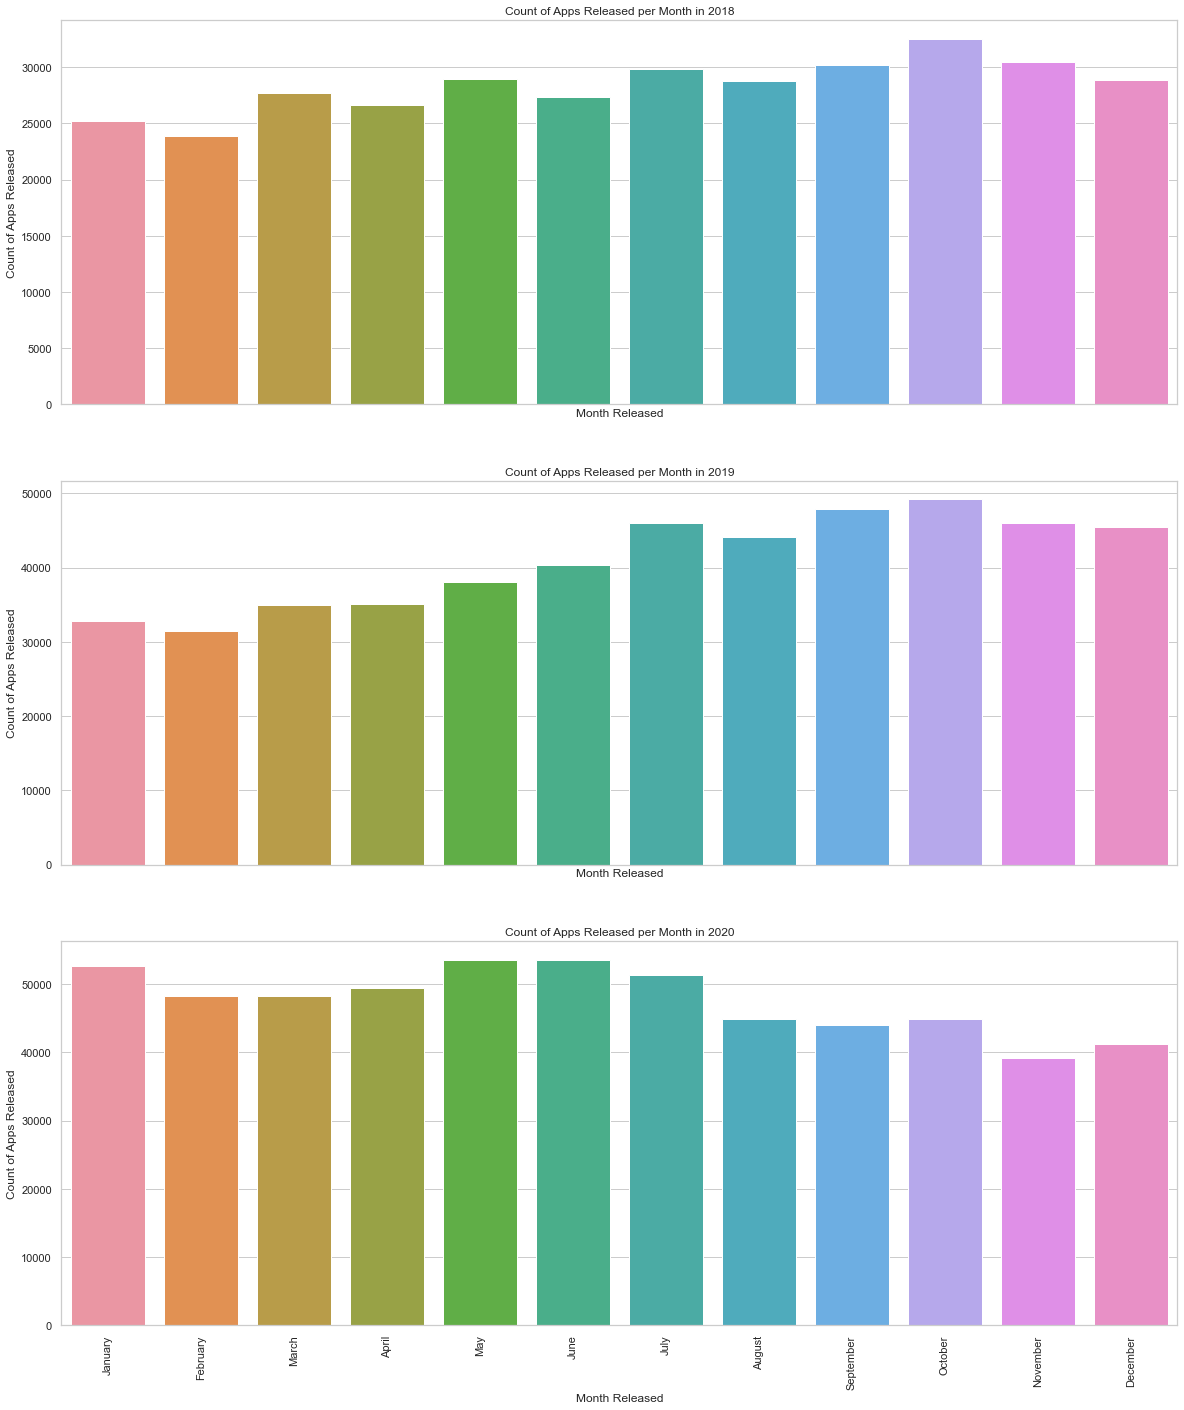

In [123]:
# Plotting subplots
fig, axes = plt.subplots(3, 1, figsize=(20, 24), sharex=True)

# Plot for 2018
sns.barplot(ax=axes[0], data=year_and_month_released_2018, x='month_released', y='count')
axes[0].set_title('Count of Apps Released per Month in 2018')
axes[0].set_xlabel('Month Released')
axes[0].set_ylabel('Count of Apps Released')
axes[0].tick_params(axis='x', rotation=90)

# Plot for 2019
sns.barplot(ax=axes[1], data=year_and_month_released_2019, x='month_released', y='count')
axes[1].set_title('Count of Apps Released per Month in 2019')
axes[1].set_xlabel('Month Released')
axes[1].set_ylabel('Count of Apps Released')
axes[1].tick_params(axis='x', rotation=90)

# Plot for 2020
sns.barplot(ax=axes[2], data=year_and_month_released_2020, x='month_released', y='count')
axes[2].set_title('Count of Apps Released per Month in 2020')
axes[2].set_xlabel('Month Released')
axes[2].set_ylabel('Count of Apps Released')
axes[2].tick_params(axis='x', rotation=90)


In [124]:
year_and_month_released.groupby('month_released')['count'].sum()

month_released
January      191564
February     186573
March        208368
April        203417
May          215813
June         193878
July         185362
August       179911
September    184549
October      193121
November     183288
December     186704
Name: count, dtype: int64


### Executive Summary
Between 2010 and 2021, a total of 2.3 million apps were released on the Google Play Store. The Education category leads with 18% of all apps released. Tools is the most downloaded category, amassing over 110 billion downloads, followed by Communication with 70 billion downloads. Role-playing apps hold the highest average ratings among all categories. Users tend to favor apps with ratings of 3.5 and above.

### Key Observations
##### App Releases:
- Education apps constitute **18%** of all releases up to 2021.
- Google Play Store crossed **500,000 app releases in 2020.**
- The highest app releases usually occur in Q3 and Q4, but in 2020, Q1 and Q2 saw significant activity.

##### Downloads:
- Tools category leads with over 110 billion downloads.
- The most downloaded apps are primarily Google-affiliated: Google Play Services, YouTube, Google, Google Maps, and Google Text-to-Speech.
- Among the top 10 downloaded apps, **40% are Tools, 20% are Communication, and the remaining 40% are divided among other categories.**

##### User Preferences:

- Role-playing apps have the highest average ratings.
- Users prefer downloading apps with ratings of **3.5 and above**.
- Adults rate apps the least, while teens and everyone rate apps the most.

##### Free vs. Paid Apps:
- **98% of apps on the Play Store are free.**
- Education has the highest number of payable apps (6,547), followed by Personalization (5,767).

### Recommendations

- *`Focus on Quality`*: Ensure apps have a rating of 3.5 or higher to increase download rates.
- *`Leverage Education Category`*: Given its dominance, developers should consider entering or expanding within the Education category, particularly with paid app offerings.
- *`Optimize Release Timing`*: Align app releases with peak periods in Q3 and Q4 to maximize visibility, but also take advantage of early-year trends observed in 2020.
- *`Capitalize on Trends`*: Given the high ratings of role-playing apps, developers could explore creating high-quality role-playing games.
- *`Understand User Demographics`*: Tailor marketing strategies to target teens, who are more likely to rate apps, and enhance features that appeal to this demographic.

**By focusing on these areas, developers and marketers can better align their strategies with observed trends and user preferences to maximize app success and market penetration.**